In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls
%cd '/content/drive/My Drive/Colab Notebooks/Python Lib Examples/TF/TF and Keras Tutorial'

drive  sample_data
/content/drive/My Drive/Colab Notebooks/Python Lib Examples/TF/TF and Keras Tutorial


In [6]:
data = pd.read_csv('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')

ParserError: ignored

#### There is error in line 134634, so we will remove this rows.

#### We will first process data before making dataframe from it

In [7]:
file = open('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
  try:
    line = line.split(',')
    last = line[5].split(';')[0]
    last = last.strip()

    if last == '':
      break;
    temp = [line[0], line[1], line[2], line[3], line[4], last]
    processedList.append(temp)
  except:
    print("Error in the line : ", i)

Error in the line :  281873
Error in the line :  281874
Error in the line :  281875


In [8]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [0]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [10]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [12]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [13]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

#### This is very unbalanced data. So, may model overfits towards __Walking__ and __Jogging__

### Balance the data

In [0]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [0]:
fs = 20

In [17]:
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

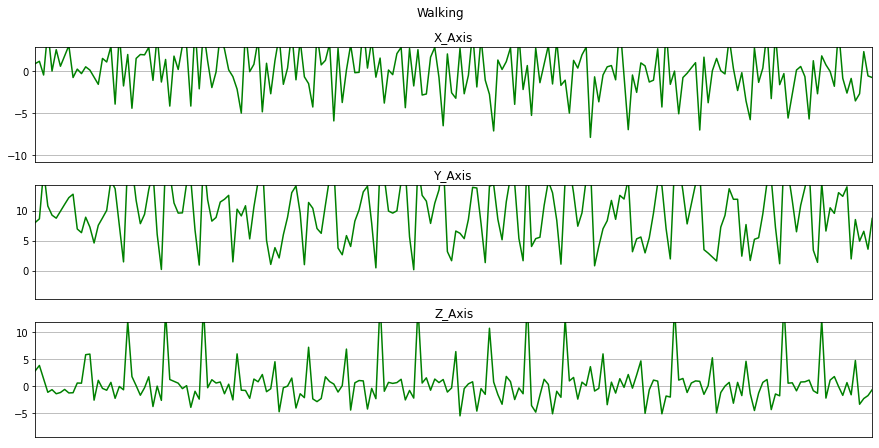

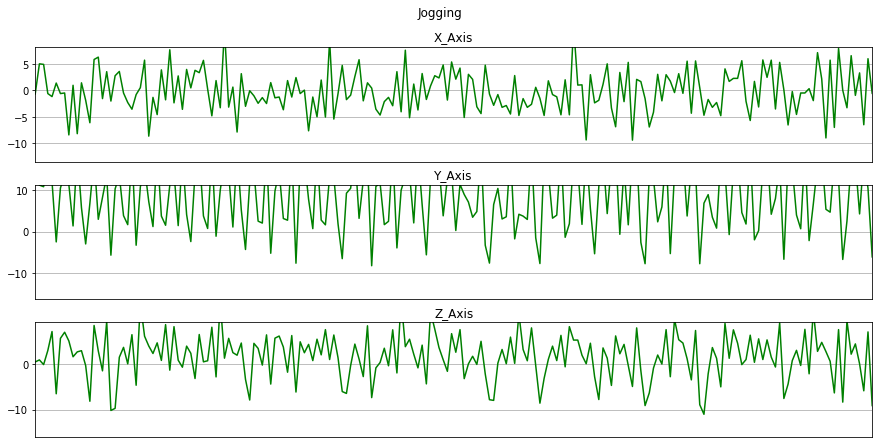

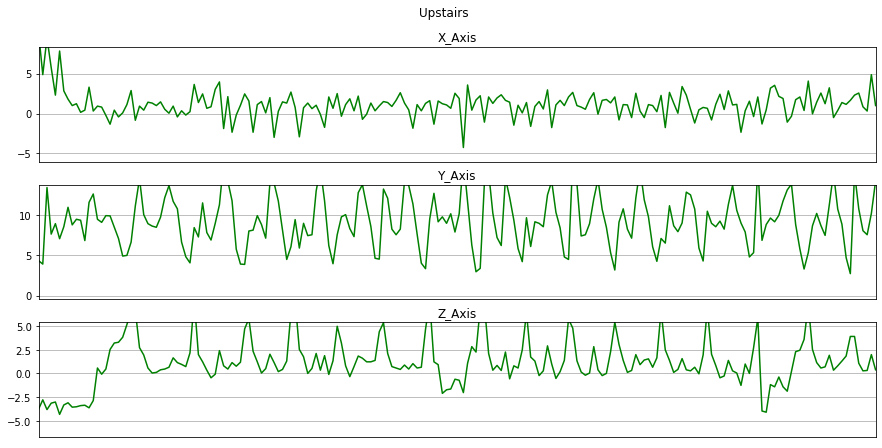

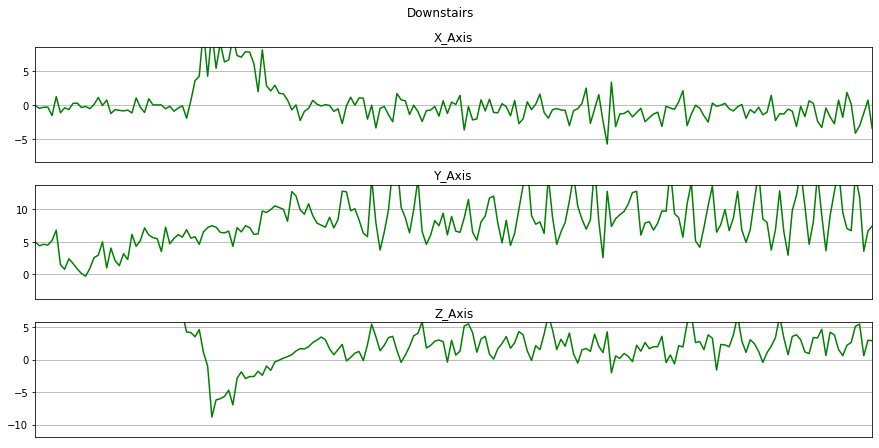

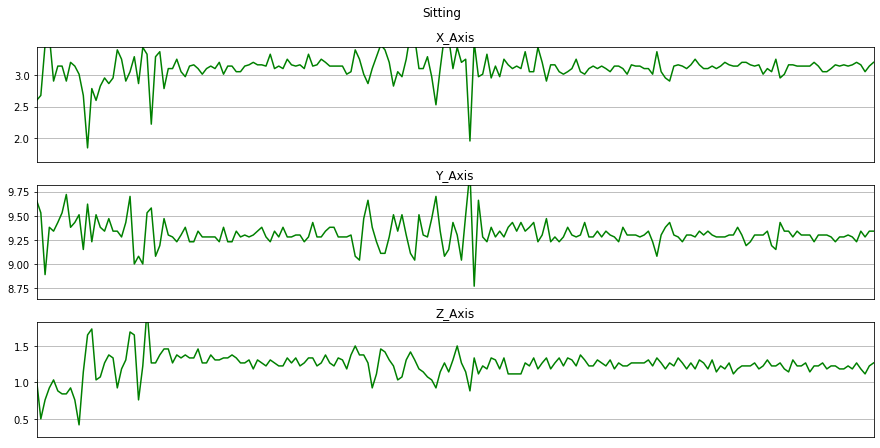

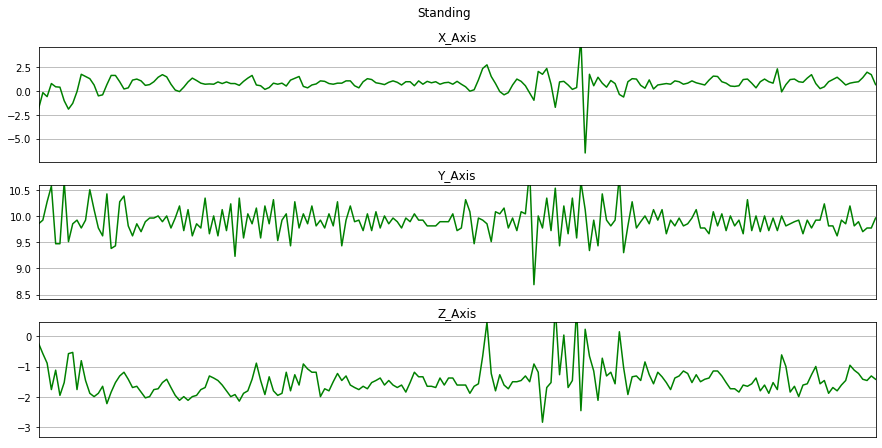

In [18]:
def plot_activity(activity, data):
  fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
  plot_axis(ax0, data['time'], data['x'], 'X_Axis')
  plot_axis(ax1, data['time'], data['y'], 'Y_Axis')
  plot_axis(ax2, data['time'], data['z'], 'Z_Axis')
  plt.subplots_adjust(hspace=0.2)
  fig.suptitle(activity)
  plt.subplots_adjust(top=0.90)
  plt.show()


def plot_axis(ax, x, y, title):
  ax.plot(x, y, 'g')
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) - np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

for activity in activities:
  data_for_plot = data[(data['activity'] == activity)][:fs*10]
  plot_activity(activity, data_for_plot)

In [19]:
df = data.drop(columns=['user', 'time'], axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [20]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [0]:
Walking = df[df['activity'] == 'Walking'].head(3555).copy()
Jogging = df[df['activity'] == 'Jogging'].head(3555).copy()
Upstairs = df[df['activity'] == 'Upstairs'].head(3555).copy()
Downstairs = df[df['activity'] == 'Downstairs'].head(3555).copy()
Sitting = df[df['activity'] == 'Sitting'].head(3555).copy()
Standing = df[df['activity'] == 'Standing'].head(3555).copy()

In [22]:
Walking.shape

(3555, 4)

In [23]:
b_data = pd.DataFrame()
b_data = b_data.append(Walking)
b_data = b_data.append(Jogging)
b_data = b_data.append(Upstairs)
b_data = b_data.append(Downstairs)
b_data = b_data.append(Sitting)
b_data = b_data.append(Standing)

b_data.shape

(21330, 4)

In [24]:
b_data['activity'].value_counts()

Standing      3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Walking       3555
Name: activity, dtype: int64

### Labelling the Data

In [0]:
label = LabelEncoder()

b_data['label'] = label.fit_transform(b_data['activity'])

In [26]:
b_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [27]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

### Standardized Data

In [0]:
x = b_data[['x', 'y', 'z']]
y = b_data['label']

In [29]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data = x, columns=['x', 'y', 'z'])
scaled_x['label'] = y.values

scaled_x

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


### Frame Preparation

In [0]:
from scipy.stats import stats

In [0]:
fs = 20
frame_size = fs*4
hop_size = fs*2

In [0]:
def get_frames(df, frame_size, hop_size):
  frames = []
  labels = []

  N_FEATURES = 3

  for i in range(0, len(df)-frame_size, hop_size):
    x = df['x'].values[i: i+frame_size]
    y = df['y'].values[i: i+frame_size]
    z = df['z'].values[i: i+frame_size]

    #Retrieve the most often used label in the segment
    label = stats.mode(df['label'][i: i+frame_size])[0][0]
    frames.append([x, y, z])
    labels.append(label)

  #Bring the segments into a better shape
  frames = np.array(frames).reshape(-1, frame_size, N_FEATURES)
  labels = np.array(labels)

  return frames, labels


In [0]:
x, y = get_frames(scaled_x, frame_size, hop_size)

In [34]:
x.shape, y.shape

((532, 80, 3), (532,))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size = 0.2, stratify = y)

In [36]:
x_train.shape, x_test.shape

((425, 80, 3), (107, 80, 3))

In [37]:
x_train[0].shape, x_test[0].shape

((80, 3), (80, 3))

In [0]:
x_train = x_train.reshape(425, 80, 3, 1)
x_test = x_test.reshape(107, 80, 3, 1)

In [39]:
x_train[0].shape, x_test[0].shape

((80, 3, 1), (80, 3, 1))

### 2D CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(16, (2,2), activation='relu', input_shape=x_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2,2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [0]:
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [42]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
14/14 [==============================] - 0s 21ms/step - loss: 1.6199 - acc: 0.3106 - val_loss: 1.3454 - val_acc: 0.4019
Epoch 2/30
14/14 [==============================] - 0s 11ms/step - loss: 1.2744 - acc: 0.5035 - val_loss: 0.9538 - val_acc: 0.7757
Epoch 3/30
14/14 [==============================] - 0s 10ms/step - loss: 0.9564 - acc: 0.6635 - val_loss: 0.6647 - val_acc: 0.8598
Epoch 4/30
14/14 [==============================] - 0s 11ms/step - loss: 0.7260 - acc: 0.7506 - val_loss: 0.4585 - val_acc: 0.8879
Epoch 5/30
14/14 [==============================] - 0s 12ms/step - loss: 0.5672 - acc: 0.8024 - val_loss: 0.3484 - val_acc: 0.9065
Epoch 6/30
14/14 [==============================] - 0s 12ms/step - loss: 0.4499 - acc: 0.8471 - val_loss: 0.2661 - val_acc: 0.9159
Epoch 7/30
14/14 [==============================] - 0s 13ms/step - loss: 0.4157 - acc: 0.8682 - val_loss: 0.3066 - val_acc: 0.9252
Epoch 8/30
14/14 [==============================] - 0s 12ms/step - loss: 0.3715 - a

In [0]:
def plot_learningcurve(history, epochs):
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model Accuracy')
  plt.xlabel('Accuracy')
  plt.ylabel('Epochs')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Loss')
  plt.ylabel('Epochs')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

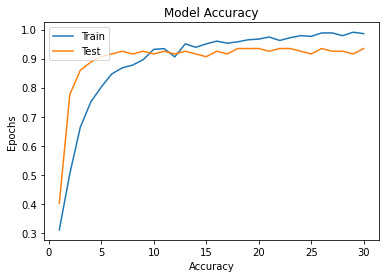

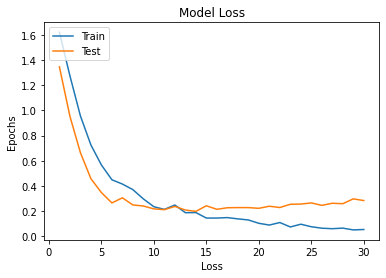

In [44]:
plot_learningcurve(history, 30)

In [0]:
y_hat = np.argmax(model.predict(x_test), axis=-1)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17  0  0  0  1  0]
 [ 0 17  0  0  0  1]
 [ 0  0 18  0  0  0]
 [ 0  0  0 18  0  0]
 [ 4  0  0  0 14  0]
 [ 0  0  0  1  0 16]]


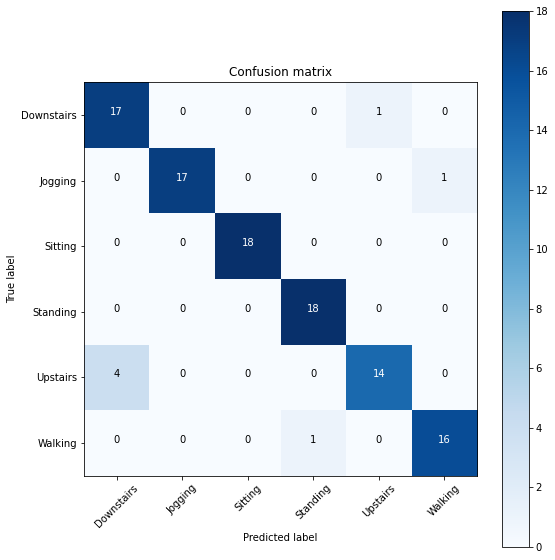

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label.classes_, normalize= False,  title='Confusion matrix')